In [1]:
import warnings
warnings.filterwarnings('ignore') # to ingnore unnecessary warinings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization
import seaborn as sns  #  visualization

from matplotlib.pyplot import xticks
%matplotlib inline

from scipy.cluster.hierarchy import linkage     # for hierarchical clustering 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



In [2]:
# import data from the CSV file into a dataframe
co_data = pd.read_csv('Country-data.csv')

In [3]:
# print first few rows of the dataframe 
co_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# check for duplicate data in country column

sum(co_data.duplicated(subset = 'country')) == 0

# no duplicates found

True

In [5]:
# shape of the datafrome (rows, columns)
co_data.shape

(167, 10)

In [6]:
co_data.info()
# check for null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# describes provides a breaf knowledge about the data

co_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### no cleaning required as there are no missing values in the dataset


# EDA

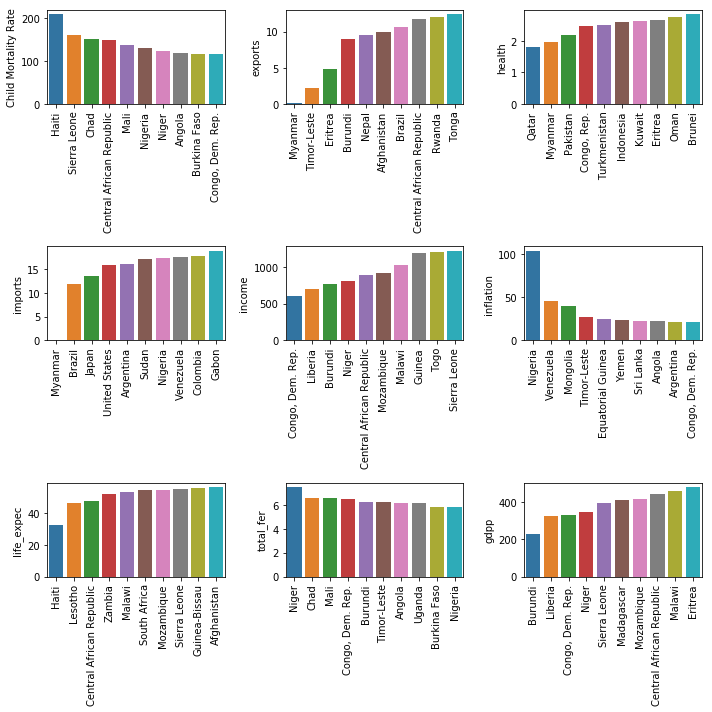

In [59]:
# Produce barplot for country VS all other attributes 
# Also only taking only top 10 worst countries for that attribute

fig, axs = plt.subplots(3,3,figsize = (15,15))

# child_mort
topCM = co_data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= topCM, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# exports
topEX = co_data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= topEX, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'exports')

# health
topHE = co_data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= topHE, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'health')

# imports
topIM = co_data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= topIM, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'imports')

# income
topIN = co_data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= topIN, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'income')

# inflation
topINF = co_data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= topINF, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'inflation')

# life_expec
topLEX = co_data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= topLEX, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'life_expec')

# total_fer
topTF = co_data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= topTF, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'total_fer')

# gdpp
topGDPP = co_data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= topGDPP, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'gdpp')

# this code snipp will rotate the x_axis lables for all plots by 90 degree
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.tight_layout()

In [9]:
# find common countries between the above 9 plots 

from functools import reduce

x = [topCM,topEX,topHE,topIM,topIN,topINF,topLEX,topTF,topGDPP]
y = ['topCM','topEX','topHE','topIM','topIN','topINF','topLEX','topTF','topGDPP']
for i in range(0,len(x)):
    print('\n')
    for j in range(i, len(x)):
        if(i != j):
            print(y[i]+' '+y[j])
            print(reduce(np.intersect1d, [x[i].country, x[j].country]))
            
            



topCM topEX
['Central African Republic']
topCM topHE
[]
topCM topIM
['Nigeria']
topCM topIN
['Central African Republic' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']
topCM topINF
['Angola' 'Congo, Dem. Rep.' 'Nigeria']
topCM topLEX
['Central African Republic' 'Haiti' 'Sierra Leone']
topCM topTF
['Angola' 'Burkina Faso' 'Chad' 'Congo, Dem. Rep.' 'Mali' 'Niger'
 'Nigeria']
topCM topGDPP
['Central African Republic' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


topEX topHE
['Eritrea' 'Myanmar']
topEX topIM
['Brazil' 'Myanmar']
topEX topIN
['Burundi' 'Central African Republic']
topEX topINF
['Timor-Leste']
topEX topLEX
['Afghanistan' 'Central African Republic']
topEX topTF
['Burundi' 'Timor-Leste']
topEX topGDPP
['Burundi' 'Central African Republic' 'Eritrea']


topHE topIM
['Myanmar']
topHE topIN
[]
topHE topINF
[]
topHE topLEX
[]
topHE topTF
[]
topHE topGDPP
['Eritrea']


topIM topIN
[]
topIM topINF
['Argentina' 'Nigeria' 'Venezuela']
topIM topLEX
[]
topIM topTF
['Nigeria']
topIM topGDPP
[]

### the above shows the list common counties for all the nine attributes .
- this will allow us to know in which countries what attributes have impact on other attributes. 
- example topCM(child_mort) and topTF(inflation) have impact on each other for many countries 

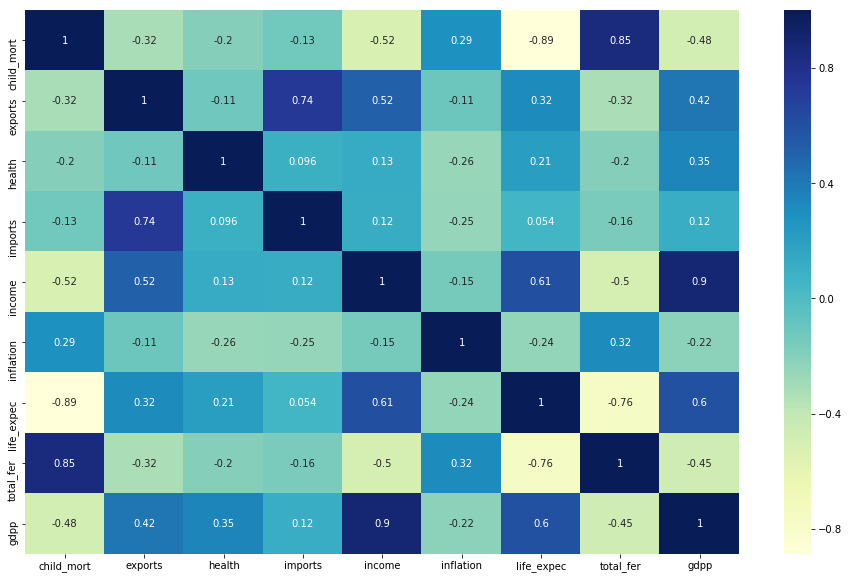

In [10]:
# correlation graph

plt.figure(figsize = (16, 10))
sns.heatmap(co_data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

* the correlation seen between child_mort and total_fer can also be seen in the top 10 country list 
- 7 out of 10 country are common in both the attributes 
- topCM topTF
['Angola','Burkina Faso' ,'Chad', 'Congo, Dem. Rep.' ,'Mali' ,'Niger',
 'Nigeria']

## Removing outliners 


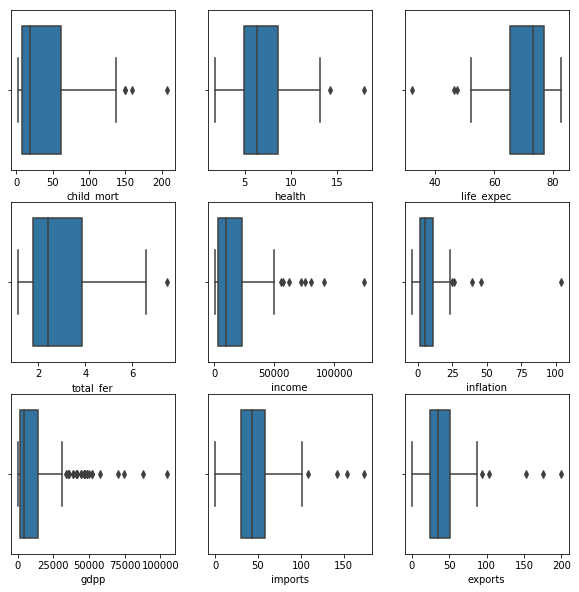

In [60]:
# boxplot to check for outliners if any

fig, axs = plt.subplots(3,3, figsize = (15,15))
plt1 = sns.boxplot(co_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(co_data['health'], ax = axs[0,1])
plt3 = sns.boxplot(co_data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(co_data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(co_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(co_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(co_data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(co_data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(co_data['exports'], ax = axs[2,2])

### we can see a lot of outlier in the dataset, which mean we need to treat the data for outliners before clustering and PCA

In [12]:
# create a copy of the dataframe to further do PCA on it 

copy = co_data.copy()
copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:

# outlier removing by taking 0.05 and 0.95 and outlier limits and not 0.25 and 0.75

# keeping in mind we need to find country's with negative extreme values

percentiles = copy['child_mort'].quantile([0.05,0.95]).values
copy['child_mort'][copy['child_mort'] <= percentiles[0]] = percentiles[0]
copy['child_mort'][copy['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = copy['health'].quantile([0.05,0.95]).values
copy['health'][copy['health'] <= percentiles[0]] = percentiles[0]
copy['health'][copy['health'] >= percentiles[1]] = percentiles[1]

percentiles = copy['life_expec'].quantile([0.05,0.95]).values
copy['life_expec'][copy['life_expec'] <= percentiles[0]] = percentiles[0]
copy['life_expec'][copy['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = copy['total_fer'].quantile([0.05,0.95]).values
copy['total_fer'][copy['total_fer'] <= percentiles[0]] = percentiles[0]
copy['total_fer'][copy['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = copy['income'].quantile([0.05,0.95]).values
copy['income'][copy['income'] <= percentiles[0]] = percentiles[0]
copy['income'][copy['income'] >= percentiles[1]] = percentiles[1]

percentiles = copy['inflation'].quantile([0.05,0.95]).values
copy['inflation'][copy['inflation'] <= percentiles[0]] = percentiles[0]
copy['inflation'][copy['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = copy['gdpp'].quantile([0.05,0.95]).values
copy['gdpp'][copy['gdpp'] <= percentiles[0]] = percentiles[0]
copy['gdpp'][copy['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = copy['imports'].quantile([0.05,0.95]).values
copy['imports'][copy['imports'] <= percentiles[0]] = percentiles[0]
copy['imports'][copy['imports'] >= percentiles[1]] = percentiles[1]

percentiles = copy['exports'].quantile([0.05,0.95]).values
copy['exports'][copy['exports'] <= percentiles[0]] = percentiles[0]
copy['exports'][copy['exports'] >= percentiles[1]] = percentiles[1]

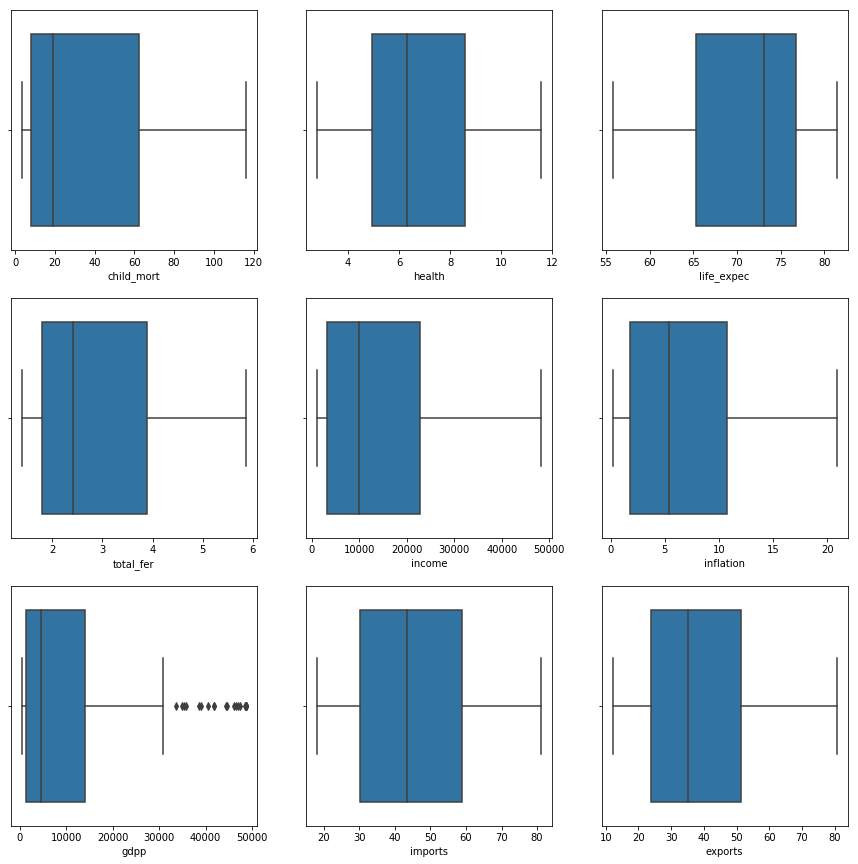

In [14]:
# boxplot to check if the outliners are handled 

fig, axs = plt.subplots(3,3, figsize = (15,15))
plt1 = sns.boxplot(copy['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(copy['health'], ax = axs[0,1])
plt3 = sns.boxplot(copy['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(copy['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(copy['income'], ax = axs[1,1])
plt6 = sns.boxplot(copy['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(copy['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(copy['imports'], ax = axs[2,1])
plt9 = sns.boxplot(copy['exports'], ax = axs[2,2])

### Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler   

In [16]:
scaler = StandardScaler()     # scaled data stored in 'scaler' for better model genration 

varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
copy[varlist] = scaler.fit_transform(copy[varlist])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42) # SVD method used to generate PCA data

In [18]:
# Putting feature variable to X
X = copy.drop(['country'],axis=1)

# Putting response variable to y
y = copy['country']

In [19]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [20]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
# PCA components after fit

pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [22]:
# PCA data is better represented in a dataframe format

colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income


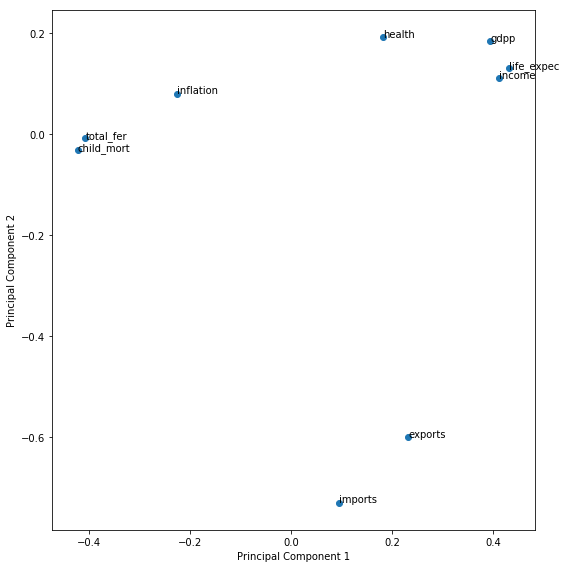

In [23]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

# Principal Components graph pc1 vs pc2


In [24]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

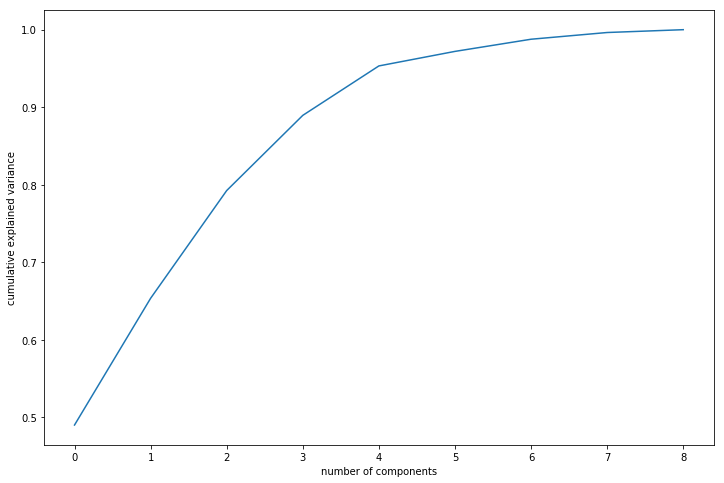

In [25]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### the above screeplot shows that 4 Principal Components can explation 95% variance
- this will be used in hierarchical clustring 

In [26]:
# important step for building model using PCA

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [27]:
df_pca = pca_final.fit_transform(X)
df_pca.shape


(167, 4)

In [28]:
# the 4 PC selected and a dataframe is generated 

df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [29]:
corrmat = np.corrcoef(df_pca.transpose())

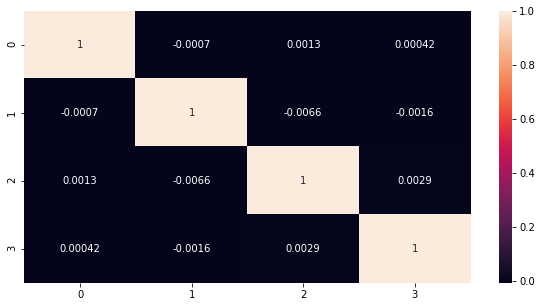

In [30]:
# correlation graph between the 4 PC's to show there is almost not relation between them

# this is to prove that the PC's selected are good for clustering

%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [31]:
# finding max and min values of correlation 

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0029369673234952453 , min corr:  -0.006552371941339207


## hopkins score
- shows if the data has tendency to generate clusters 

In [32]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
# higher the hopkins values higher the tendency to make clusters  
hopkins(df_pca)

0.7024658001374133

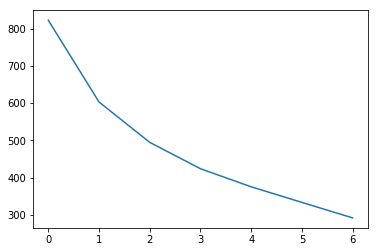

In [34]:
# K-means elbow curve to find K value

from sklearn.cluster import KMeans
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [35]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3250564127058999
For n_clusters=3, the silhouette score is 0.317534113202897
For n_clusters=4, the silhouette score is 0.30719758172454154
For n_clusters=5, the silhouette score is 0.3112489491120467
For n_clusters=6, the silhouette score is 0.32375199591533094
For n_clusters=7, the silhouette score is 0.3145120214916648
For n_clusters=8, the silhouette score is 0.2945144671486896


- both metrics show k value 3 for k-means clustering 

In [36]:

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [38]:
pca_cluster_k_mean = pd.concat([copy['country'],df_pca], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_k_mean.head()

,country,0,1,2,3
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249
1,Albania,0.483960,-0.161179,-0.284769,-1.425874
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794
3,Angola,-3.359135,1.259644,1.980609,1.750224
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221


In [39]:
pca_cluster_k_mean['ClusterID'] = kmeans.labels_

In [40]:
# K-means cluster dataframe 

clustered_data_k_mean = pca_cluster_k_mean[['country','ClusterID']].merge(co_data, on = 'country')
clustered_data_k_mean.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [41]:
# these mean values will help in better comparison of cluster data with each other 

km_clusters_child_mort = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(clustered_data_k_mean.groupby(["ClusterID"]).gdpp.mean())

In [42]:
df = pd.concat([pd.Series(list(range(0,3))), km_clusters_child_mort,km_clusters_exports, km_clusters_health, km_clusters_imports,
               km_clusters_income, km_clusters_inflation, km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.237838,58.097297,8.782973,51.281081,45056.756757,2.588432,79.956757,1.755676,42102.702703
1,1,21.575309,40.509741,6.153827,46.966246,12430.617284,7.648877,72.979012,2.274321,6355.975309
2,2,90.810204,29.271633,6.424286,43.448980,3860.877551,11.923163,59.451020,4.961837,1885.306122


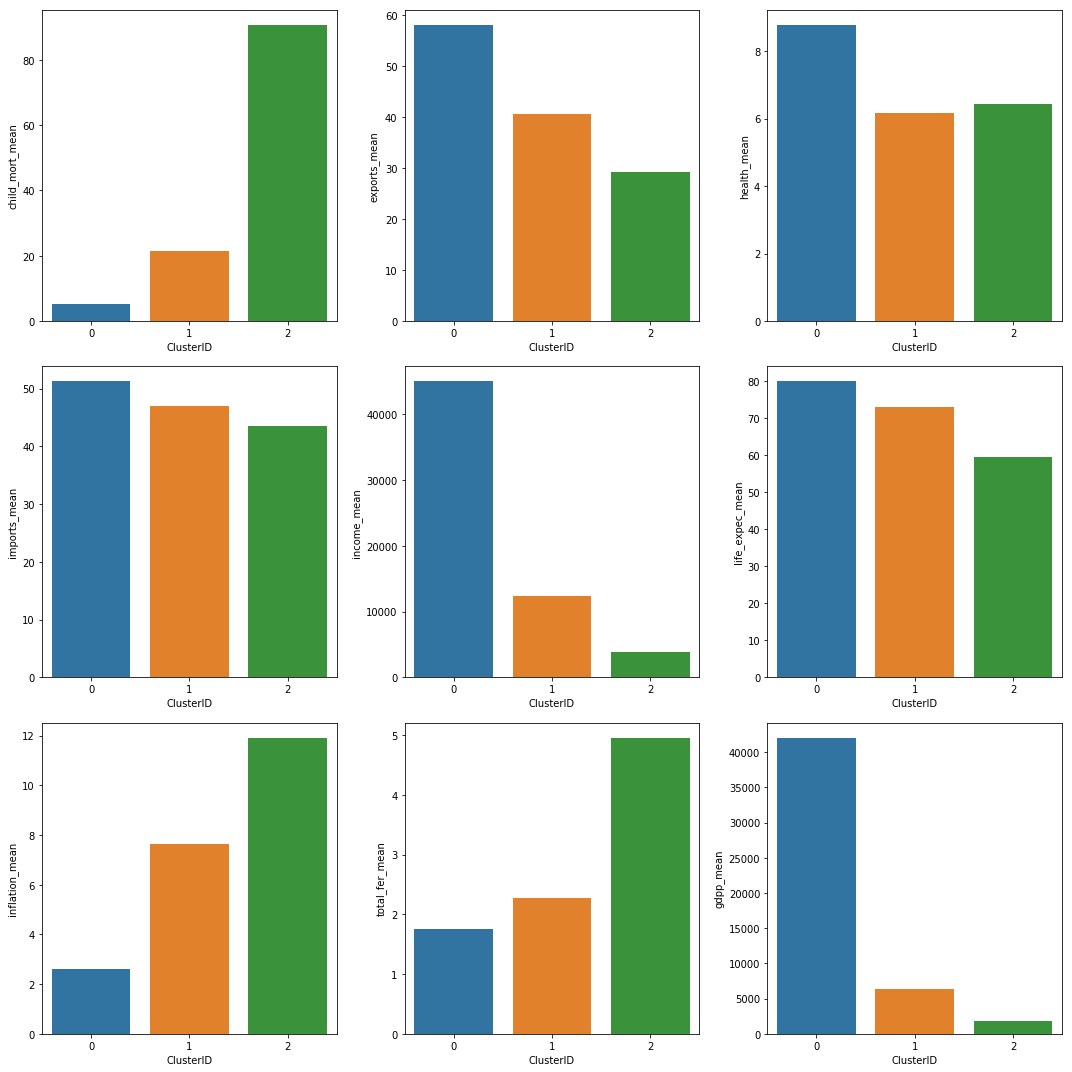

In [43]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

### looking at the visualization cluster 2 looks the one NOG need to focus their resources on
- please check with the true list of countries at the bottom of this notebook to find the correct cluster

In [72]:
clustered_data_k_mean[clustered_data_k_mean.ClusterID == 2].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

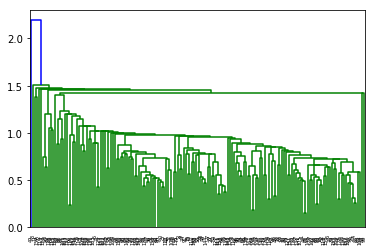

In [45]:
# Hierarchical clustering for single linkage

mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

### this above single Hierarchical clustering shows no cluster 

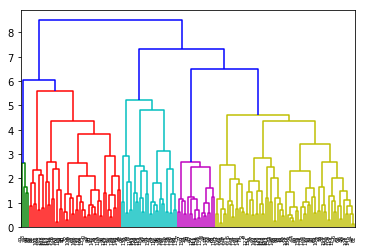

In [46]:
# Hierarchical clustering for complete linkage

mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### this shows there maybe total 5 cluster in the dataset 

In [47]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [48]:
pca_cluster_hc = pd.concat([copy['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


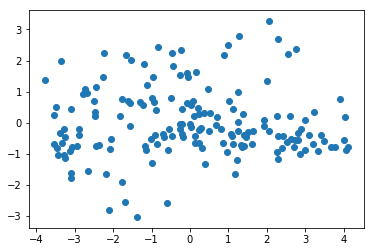

In [49]:
# cluster scatter plot 

plt.scatter(pca_cluster_hc.PC1,pca_cluster_hc.PC3)

In [50]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(co_data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Text(0, 0.5, 'total_fer')

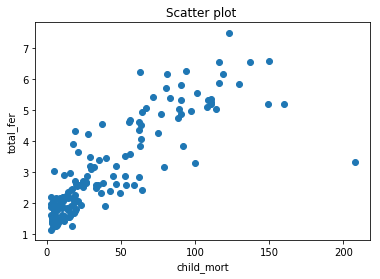

In [64]:
# cluster scatter plot for 

plt.scatter(clustered_data_hc.child_mort,clustered_data_hc.total_fer)
plt.title('Scatter plot ')
plt.xlabel('child_mort')
plt.ylabel('total_fer')

# child_mort and total_fer have a positive relation 

In [52]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [53]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


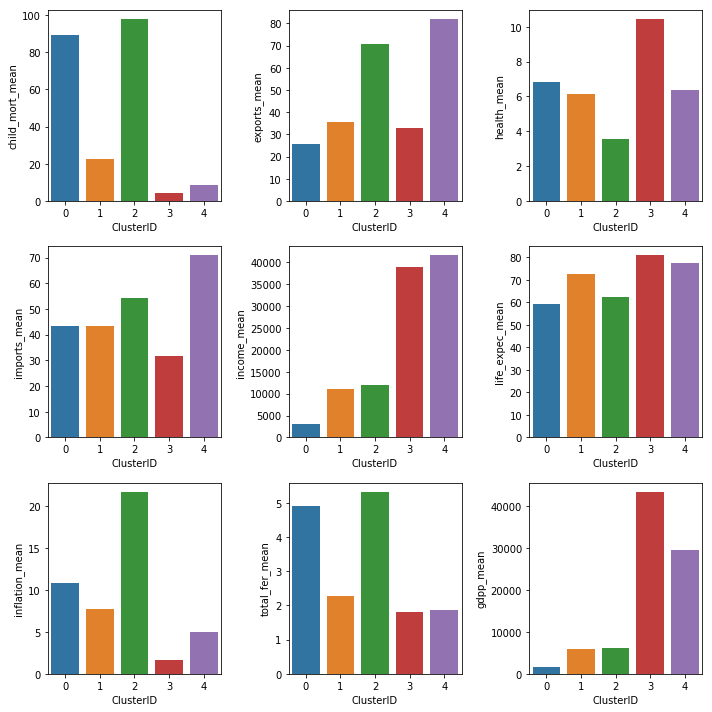

In [74]:
fig, axs = plt.subplots(3,3,figsize = (10,10))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

### Looking at the above analysis we see that cluster 0 needs the most help from the NGO

## Country's in cluster 0 are

In [55]:
A = clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

In [56]:
A

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

## countries in hierarchical cluster
- 'Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi'
- 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
- 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
- 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
- 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
- 'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
- 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
- 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
- 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'

In [71]:
B = clustered_data_k_mean[clustered_data_k_mean.ClusterID == 2].country.values
B

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

## Countries in K-means cluster 
- 'Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
- 'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
- 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
- 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
- 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
- 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
- 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
- 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
- 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
- 'Togo', 'Uganda', 'Yemen', 'Zambia'

In [73]:
C = np.intersect1d(A, B)
C
# this is the list of countries on which the NGO needs to focus their resources
# THIS ALSO HELPS IN FINDING WHICH CLUSTERS FROM K-MEANS AND HIERARCHICAL CLUSTRING PROVIDE THE SAME RESULT

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

## Countries common between A and B which need The NOG's help
- 'Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
- 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
- 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
- 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
- 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
- 'Mali', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
- 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
- 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
- 'Togo', 'Uganda', 'Yemen', 'Zambia'

## Increasing the number of cluster (more than 5) in the model will produce clusters which will contain only one country in it.
## if we take more than 5 clusters that is 6 and 7, the two new clusters will only have 1 country in them.